In [2]:
#### Randomly choose 5 events ####

import numpy as np
import pandas as pd

# Load the CSV file with names and timesteps
file_path = 'timesteps_and_names.csv'
timesteps_and_names = pd.read_csv(file_path)

# Randomly select five timesteps to compare
np.random.seed(42)  # For reproducibility
selected_timesteps = np.random.choice(timesteps_and_names.index, size=5, replace=False)

# Extract the chosen rows based on the selected_timesteps
selected_rows = timesteps_and_names.iloc[selected_timesteps]

# Display the selected rows
print(selected_rows)


    Dataset  Step  Timestep      Name
203    Test   204       849  AL252005
266    Test   267       279  AL062009
152    Test   153       379  AL092004
9      Test    10       782  AL182012
233    Test   234       237  AL052012


/var/folders/65/8n3mvtl125b4zbpmsx72qjjw0000gn/T/ipykernel_28383/756043431.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.01, .7, 1])


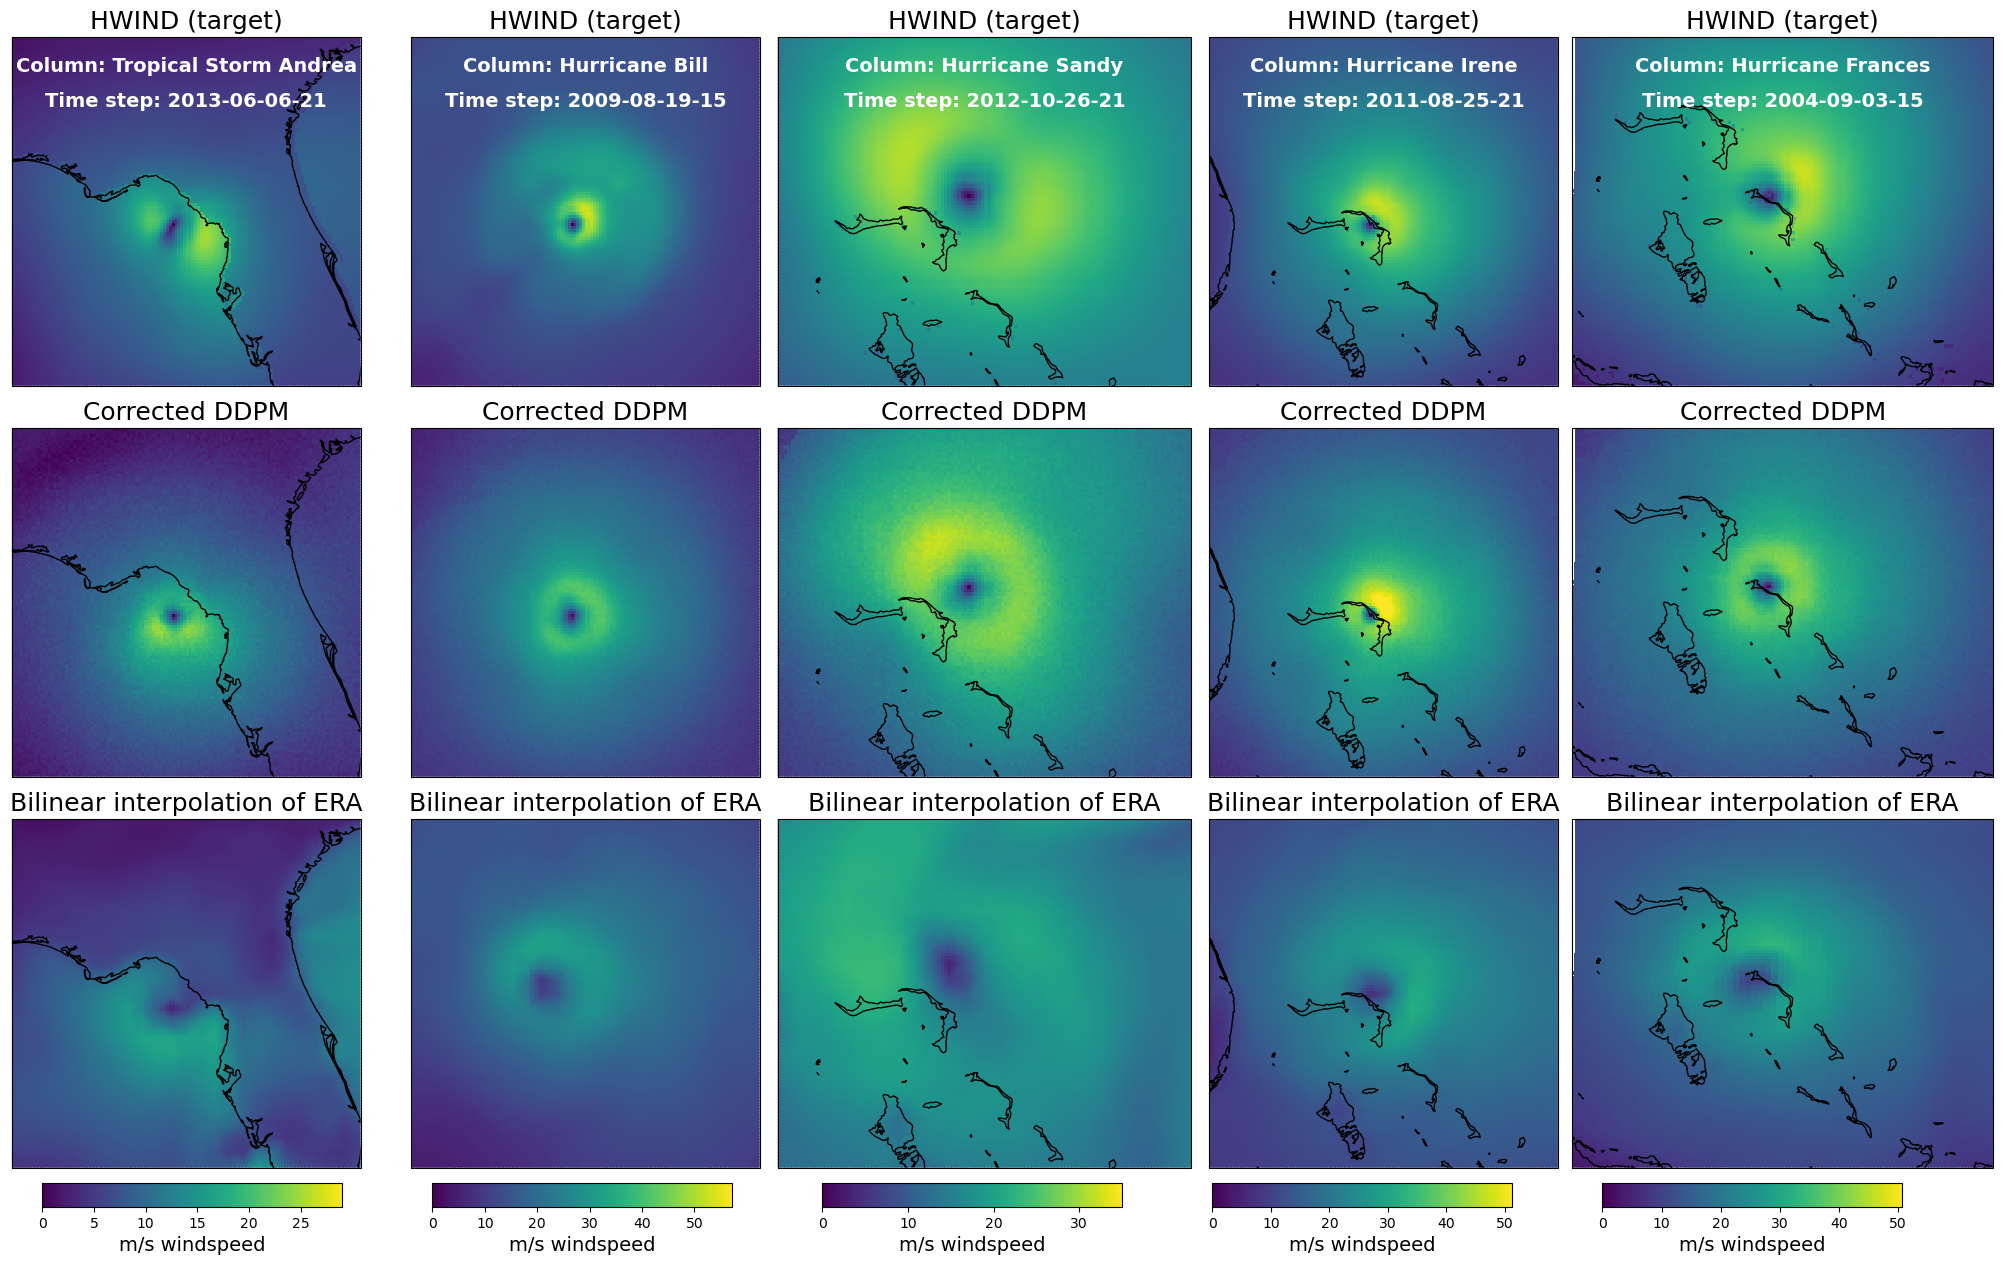

In [38]:
##### Loads IBTrAC data and plots the randomly chosen timesteps

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from matplotlib.colors import LinearSegmentedColormap

selected_rows = timesteps_and_names.iloc[selected_timesteps]
mat_file_path = # Ibtracs datasets
mat_data = scipy.io.loadmat(mat_file_path)

# Convert 'namez' to a flat list of strings
namez_list = [''.join(name[0]) for name in namez.flatten()]

# Create a DataFrame to display the results
corresponding_values = []
# Convert 'namez' to a flat list of strings
namez_list = [''.join(name[0]) for name in namez.flatten()]

# Extract the corresponding values for each Timestep
corresponding_values = []
for index, row in selected_rows.iterrows():
    timestep = row['Timestep']
    name = row['Name']
    timestep = names[timestep]
    corresponding_values.append()
    
corresponding_values_df = pd.DataFrame(corresponding_values)

from scipy.interpolate import RegularGridInterpolator
import cartopy.crs as ccrs
import cartopy.feature as cfeature
fig, axes = plt.subplots(3, 5, figsize=(30, 12), subplot_kw={'projection': ccrs.PlateCarree()})  # 3 rows and 5 columns
axes = axes.reshape((3, 5))
from scipy.interpolate import interp2d
from scipy.interpolate import griddata

namess = [] # Chosen event names

for i, timestep in enumerate(selected_timesteps):
    event_y_test = y_test_reshaped[timestep]
    event_predictions = test_predictions_reshaped[timestep]
    error_map = np.abs(event_y_test - event_predictions)
    
    lat = corresponding_values_df.Latitude[i]
    lon = corresponding_values_df.Longitude[i]
    wss = corresponding_values_df.ws[i]
    name = namess[i]
    naa = corresponding_values_df.Timestep[i]
    vmin = np.min(event_y_test)
    vmax = np.max(event_y_test)

    latlr = corresponding_values_df.Latitudelr[i]
    lonlr = corresponding_values_df.Longitudelr[i]
    wss = corresponding_values_df.ws[i]
    
    # Plot the actual data
    actual_contour = axes[0, i].pcolor(lat, lon, event_y_test[2:126,2:126], cmap='viridis', vmin=0, vmax=vmax+4)
    axes[0, i].set_title(f'HWIND (target)', fontsize=18)
    axes[0, i].set_xlabel('Longitude')
    axes[0, i].set_ylabel('Latitude')
    axes[0, i].coastlines()

    # Plot the predicted data
    predicted_contour = axes[1, i].pcolor(lat, lon, event_predictions[2:126,2:126], cmap='viridis', vmin=0, vmax=vmax+4)
    axes[1, i].set_title(f'Corrected DDPM', fontsize=18)
    axes[1, i].set_xlabel('Longitude')
    axes[1, i].set_ylabel('Latitude')
    axes[1, i].coastlines()
    lat_grid, lon_grid = np.meshgrid(lon[:,0],lat[0,:], indexing='ij')

    # Prepare the lower resolution data points and values
    lr_points = np.vstack([latlr.ravel(), lonlr.ravel()]).T  # This is the grid where your data ('wss') is defined
    lr_values = wss.ravel()  # The values at these lower resolution points

    # Define the high resolution points where you want to interpolate the data
    hr_points = np.vstack([lat_grid.ravel(), lon_grid.ravel()]).T

    # Perform interpolation using griddata
    interpolated_values = # bilinear using scipy.interpolate.interp2d 

    error_contour = axes[2, i].pcolor(lat, lon, interpolated_grid, cmap='viridis', vmin=0, vmax=vmax+4)
    axes[2, i].set_title(f'Bilinear interpolation of ERA', fontsize=18)
    axes[2, i].set_xlabel('Longitude')
    axes[2, i].set_ylabel('Latitude')
    naa_str = f'{naa[:4]}-{naa[4:6]}-{naa[6:8]}-{naa[8:]}'
    axes[2, i].coastlines()
    
    if i == 2 or i == 4:
        axes[2, i].set_ylim([np.min(lon), np.max(lon)-1])
        axes[1, i].set_ylim([np.min(lon), np.max(lon)-1])
        axes[0, i].set_ylim([np.min(lon), np.max(lon)-1])
        
    for j in range(1):
        axes[j, i].text(0.5, 0.9, f'Column: {name}', ha='center', transform=axes[j, i].transAxes, fontsize=14, color='white', fontweight='bold')
        axes[j, i].text(0.5, 0.8, f'Time step: {naa_str}', ha='center', transform=axes[j, i].transAxes, fontsize=14, color='white', fontweight='bold')

for i in range(5):
    cbar_ax = fig.add_axes([0.036 + 0.13 * i, -0.01, 0.1, 0.02])  # Adjust the position and size of each colorbar
    cbar = fig.colorbar(axes[0, i].collections[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label('m/s windspeed', fontsize=14)

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0.01, .7, 1])
plt.savefig('WIND_DDPM_4c.png', dpi=500, bbox_inches='tight')
plt.show()


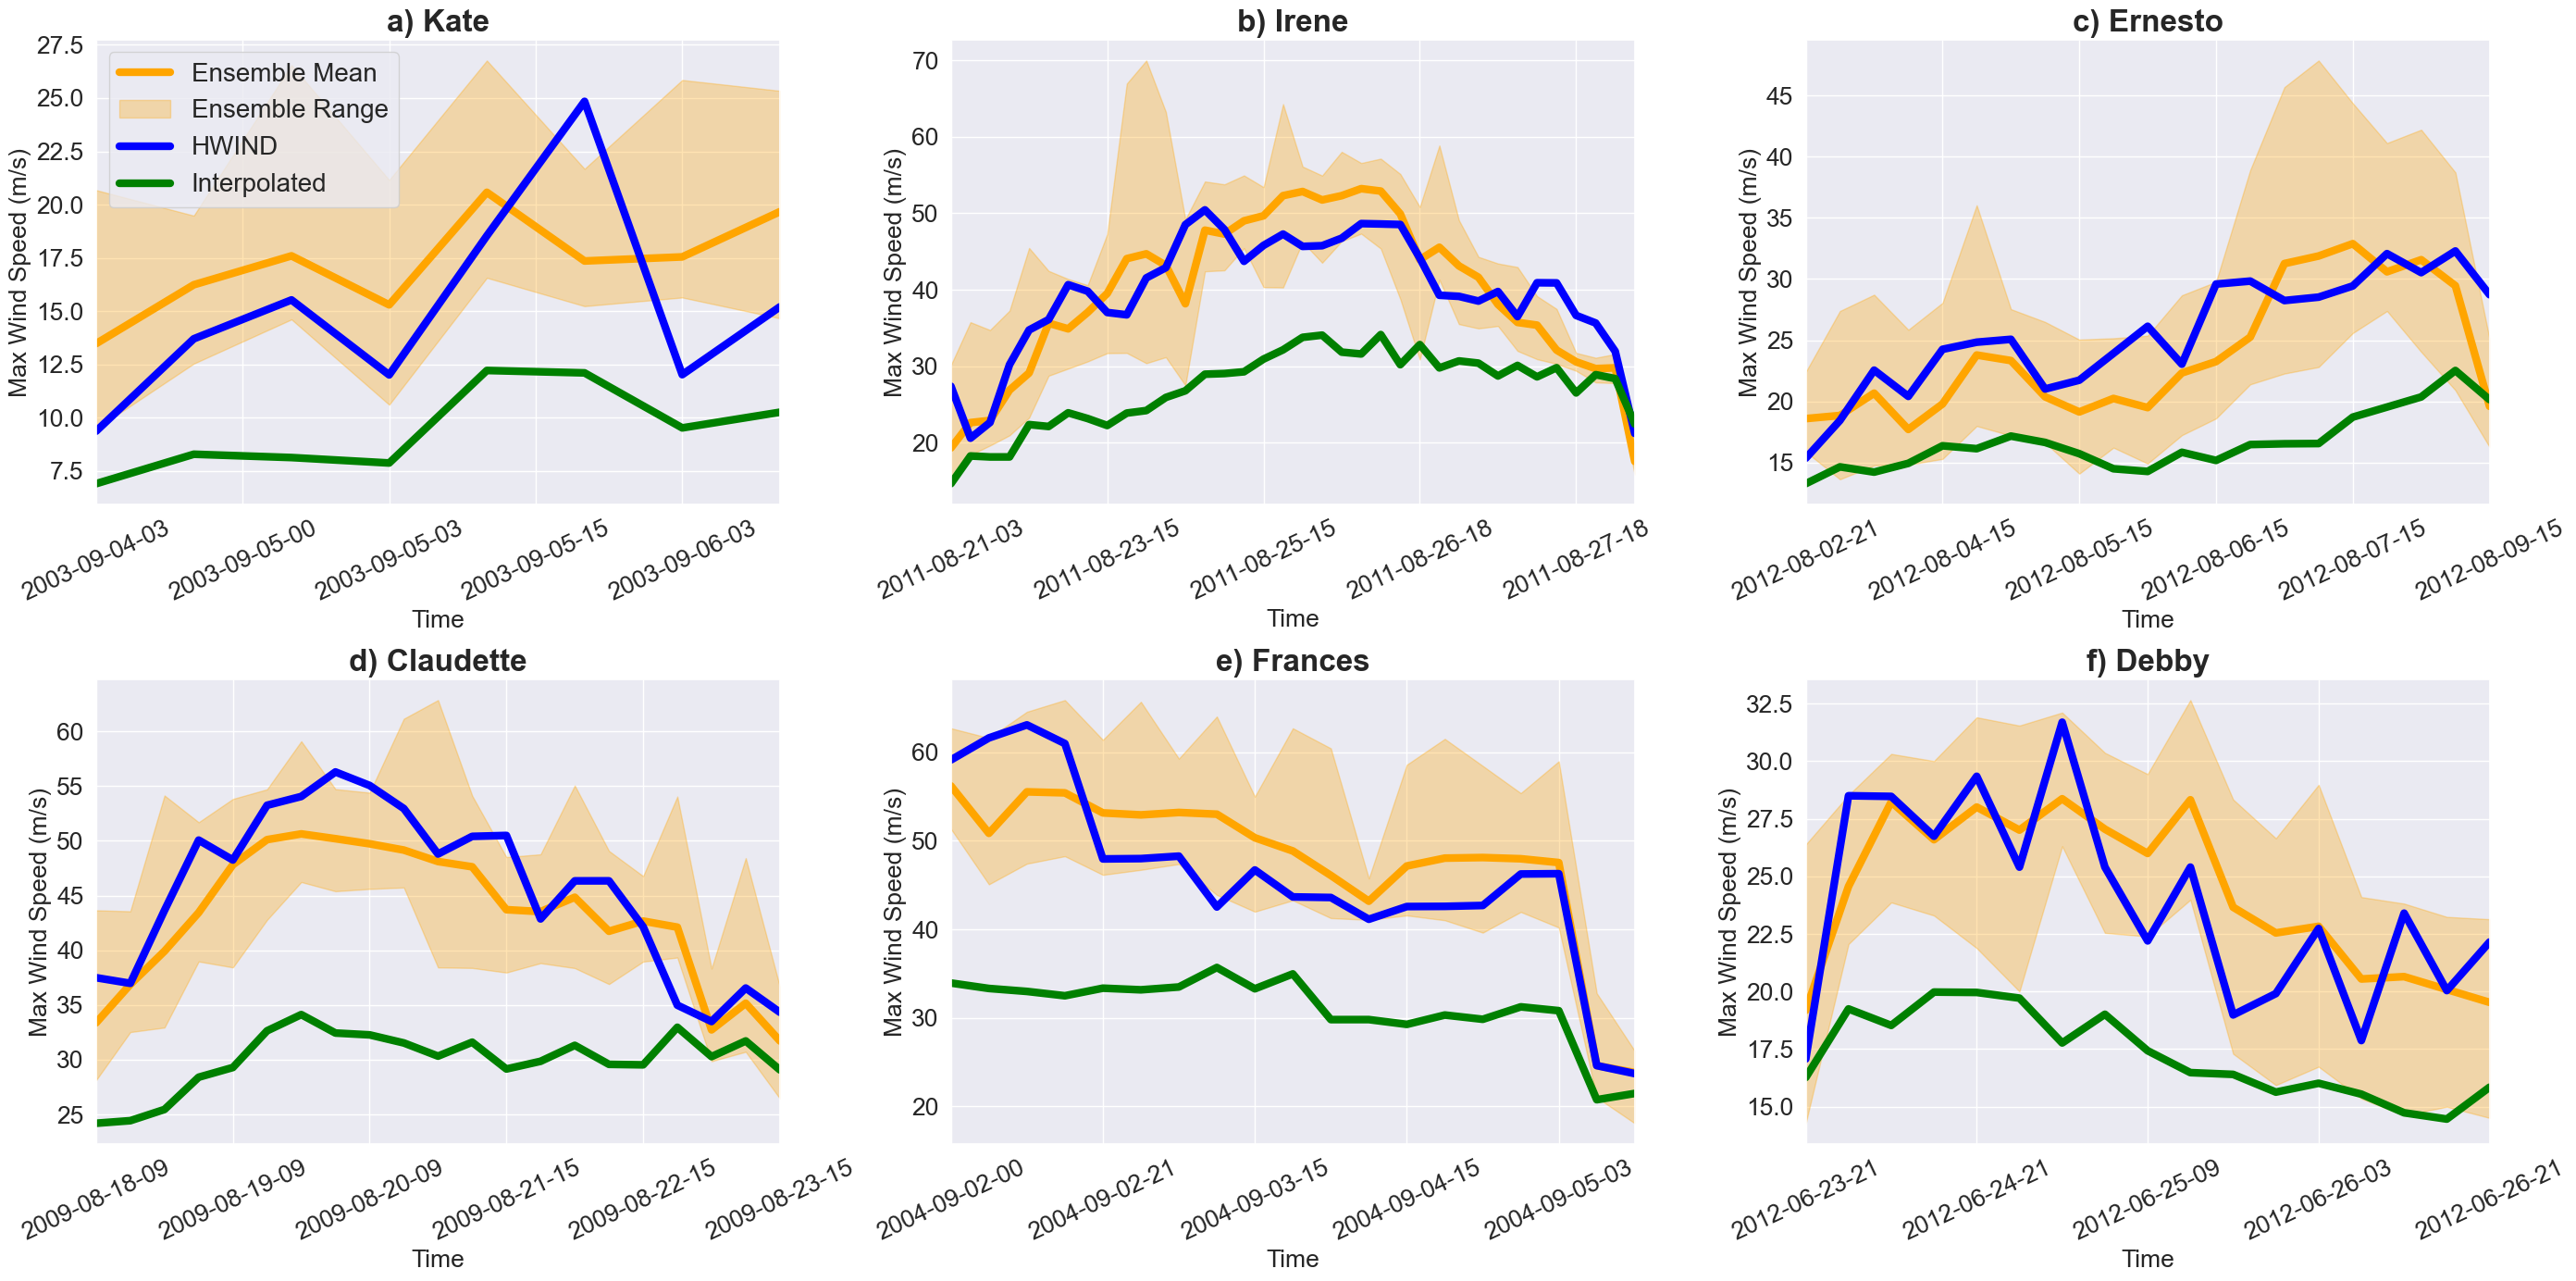

In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# Combine ensemble results into a single DataFrame
all_ensemble_max_values = pd.concat(ensemble_max_values, keys=file_endings, names=['Ensemble', 'Index']).reset_index(level='Ensemble')

# Calculate mean, min, and max for the ensemble predictions grouped by Name and Timestep
ensemble_stats = all_ensemble_max_values.groupby(['Name', 'Timestep']).agg({
    'Max_Wind_Speed_Pred': ['mean', 'min', 'max'],
    'Max_Wind_Speed_Test': 'mean',
    'Max_Wind_Speed_Interp': 'mean'
}).reset_index()

# Rename columns for easier access
ensemble_stats.columns = ['Name', 'Timestep', 'Pred_Mean', 'Pred_Min', 'Pred_Max', 'Test_Mean', 'Interp_Mean']

# Randomly select 6 unique names
random_names = random.sample(list(ensemble_stats['Name'].unique()), 6)
random_names = ['AL122003', 'AL092011', 'AL052012', 'AL032009', 'AL062004', 'AL042012']
random_namesp = ['Kate','Irene', 'Ernesto', 'Claudette', 'Frances', 'Debby']

# Labels for subplots
subplot_labels = ['a', 'b', 'c', 'd', 'e', 'f']
    
# Plotting the mean and range of the ensemble predictions for the randomly selected names
fig, axs = plt.subplots(2,3, figsize=(28, 14))
random.seed(38)  # For reproducibility
v = 0

for ax, name, label in zip(axs.flatten(), random_names, subplot_labels):
    subset = ensemble_stats[ensemble_stats['Name'] == name]

    ax.plot(subset['Timestep'], subset['Pred_Mean'], label='Ensemble Mean', color='orange', linewidth=6)
    ax.fill_between(subset['Timestep'],
                    subset['Pred_Min'],
                    subset['Pred_Max'],
                    color='orange', alpha=0.3, label='Ensemble Range')
    ax.plot(subset['Timestep'], subset['Test_Mean'], label='HWIND', color='blue', linewidth=6)
    ax.plot(subset['Timestep'], subset['Interp_Mean'], label='Interpolated', color='green', linewidth=6)
    ax.set_title(f'{label}) {random_namesp[v]}', fontsize=24, fontweight="bold")
    
    v = v + 1
    ax.set_xlabel('Time', fontsize=19)
    ax.set_ylabel('Max Wind Speed (m/s)', fontsize=19)
    if v == 1:
        ax.legend(fontsize=20, title_fontsize=16)
    ax.tick_params(axis='x', rotation=25, labelsize=19)
    ax.tick_params(axis='y', labelsize=19)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Limit the number of x-axis ticks to 5

    # Set x-axis limits to remove gaps at the beginning and end
    ax.set_xlim(subset['Timestep'].min(), subset['Timestep'].max())
 

plt.tight_layout()
plt.savefig('Max_Wind_Speed_vs_Time_Subplots.png', dpi=500, bbox_inches='tight')
plt.show()
